1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

With eigendecomposition

Eigenvalues = [2.64036267e+01 1.89067091e-15 1.91352091e+00]

Eigenvectors =
[[-0.11503337 -0.81649658  0.56577439]
 [-0.57789591 -0.40824829 -0.70666092]
 [-0.80796265  0.40824829  0.42488786]] 


With SVD

Eigenvalues = [2.64284397e+01 1.91404682e+00 2.83341800e-30]

Eigenvectors =
[[-0.11494995  0.56579134 -0.81649658]
 [-0.57800009 -0.70657571 -0.40824829]
 [-0.8079      0.42500697  0.40824829]]

By selecting the component 0, we retain 93.25% of the total variability
By selecting the component 1, we retain 6.75% of the total variability
By selecting the component 2, we retain 0.00% of the total variability
So by selecting the first 2 component, we retain over the 99% of the total variability


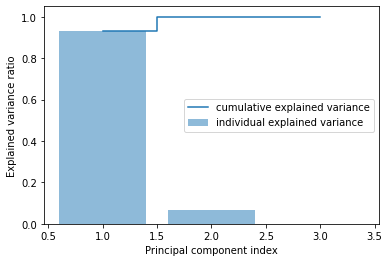

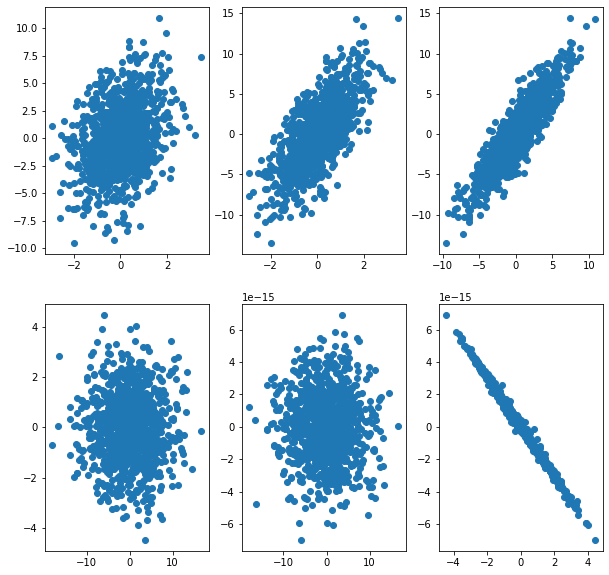

In [5]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
m = np.matrix([x1, x2, x3])
c = np.cov(m)

l, V = la.eig(c)
l = np.real_if_close(l)
print('With eigendecomposition\n')
print('Eigenvalues =', l)
print('\nEigenvectors =')
print(V,'\n\n')


U, S, Vt = la.svd(m)
l_svd = S**2/(N-1)
V_svd = U
print('With SVD\n')
print('Eigenvalues =', l_svd)
print('\nEigenvectors =')
print(V_svd)

l, V = np.linalg.eig(c)
Lambda = np.diag(l_svd)

print("\nBy selecting the component 0, we retain %.2f%% of the total variability" % (100*Lambda[0,0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (100*Lambda[1,1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (100*Lambda[2,2]/Lambda.trace()))
print("So by selecting the first 2 component, we retain over the 99% of the total variability")

tot = sum(l)
var_exp = [(i / tot) for i in sorted(l, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,4), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,4), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

eigen_pairs = [(np.abs(l[i]), V[:, i]) for i in range(len(l))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))

m_pca = (m.T).dot(w)
m_pca= np.append(m_pca, np.zeros((N,1)), axis=1) 

fig, ax = plt.subplots(2 ,3, figsize=(10,10))
m = m.T
ax[0,0].scatter([m[:, 0]], [m[:, 1]])
ax[0,1].scatter([m[:, 0]], [m[:, 2]])
ax[0,2].scatter([m[:, 1]], [m[:, 2]])
ax[1,0].scatter([m_pca[:, 0]], [m_pca[:, 1]])
ax[1,1].scatter([m_pca[:, 0]], [m_pca[:, 2]])
ax[1,2].scatter([m_pca[:, 1]], [m_pca[:, 2]])
plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.


By selecting the component 0, we retain 92.87% of the total variability
By selecting the component 1, we retain 7.05% of the total variability


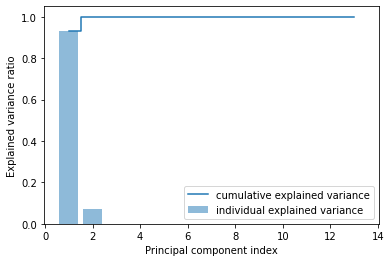

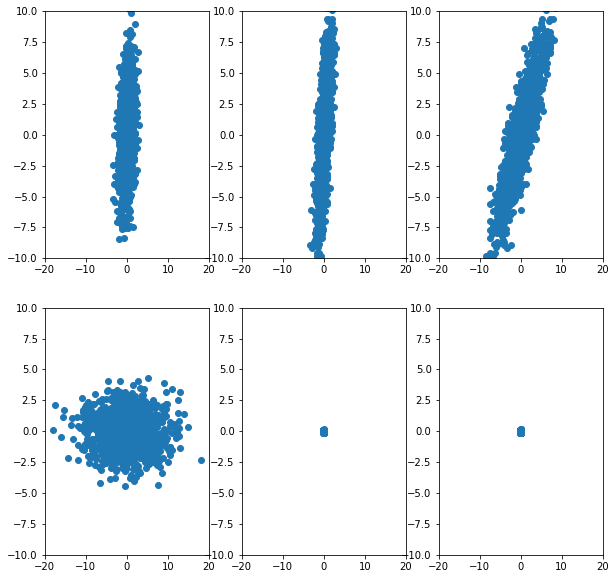

Result are really similar to the previous example the uncorrelated noise do not change the PCA


In [33]:
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
x4 = np.random.normal(0, 1/20, (10, N))
m = np.matrix([x1, x2, x3])
m = np.append(m, x4, axis=0) 
c = np.cov(m)

U, S, Vt = la.svd(m)
l_svd = S**2/(N-1)
V_svd = U

l, V = np.linalg.eig(c)
Lambda = np.diag(l_svd)

print("\nBy selecting the component 0, we retain %.2f%% of the total variability" % (100*Lambda[0,0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (100*Lambda[1,1]/Lambda.trace()))

tot = sum(l)
var_exp = [(i / tot) for i in sorted(l, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

eigen_pairs = [(np.abs(l[i]), V[:, i]) for i in range(len(l))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)
temp = []
for e_p in eigen_pairs:
    temp += [e_p[1][:, np.newaxis], ]
w = np.hstack(temp)

m_pca_noise = (m.T).dot(w)
fig, ax = plt.subplots(2 ,3, figsize=(10,10))
m = m.T
for axx in ax:
    for a in axx:
        a.set_xlim([-20, 20])
        a.set_ylim([-10, 10])
ax[0,0].scatter([m[:, 0]], [m[:, 1]])
ax[0,1].scatter([m[:, 0]], [m[:, 2]])
ax[0,2].scatter([m[:, 1]], [m[:, 2]])
ax[1,0].scatter([m_pca_noise[:, 0]], [m_pca_noise[:, 1]])
ax[1,1].scatter([m_pca_noise[:, 3]], [m_pca_noise[:, 8]])
ax[1,2].scatter([m_pca_noise[:, 4]], [m_pca_noise[:, 10]])
plt.show()
print('Result are really similar to the previous example the uncorrelated noise do not change the PCA')

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [7]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

(10, 19020)


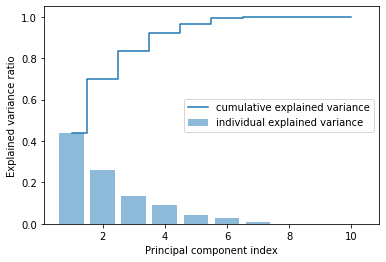

By selecting 3 components, we retain 83.34% of the total variability
[[ -66.77089773   55.59819199  -13.78292863]
 [-174.58825545  109.89159164  -33.98712847]
 [-243.4405017   111.28040599 -162.32311255]
 ...
 [-247.77933511  105.15480052  -10.00695463]
 [-396.07182135   87.9691505  -157.61663452]
 [-372.58159483 -133.8797287   -92.68480124]]


In [8]:
df = pd.read_csv('data/magic04.data', names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'])
m = df.loc[:,['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']].to_numpy().copy()
m = m.T
print(m.shape)
c = np.cov(m)

U, S, Vt = la.svd(m)
l_svd = S**2/(N-1)
V_svd = U

l, V = np.linalg.eig(c)
Lambda = np.diag(l_svd)

tot = sum(l)
var_exp = [(i / tot) for i in sorted(l, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(np.arange(len(var_exp)) +1 , var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(np.arange(len(var_exp)) +1 , cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

print("By selecting 3 components, we retain %.2f%% of the total variability" % (100*cum_var_exp[2]))

eigen_pairs = [(np.abs(l[i]), V[:, i]) for i in range(len(l))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))

m_pca = (m.T).dot(w)
print(m_pca)